## TASK 0

In [148]:
import duckdb
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt


In [99]:
# handle paths
duckdb_path = "data/sakila.duckdb"
Path(duckdb_path).unlink(missing_ok=True)

# connect to duckdb file with context manager
with duckdb.connect(duckdb_path) as conn, open("sql/load_sakila.sql") as ingest_scripts:
    conn.sql(ingest_scripts.read())
    # create pandas dataframes from the created duckdb connection
    description = conn.sql("DESC;").df()
    

## EDA TASK

In [ ]:
#task 1 a
with duckdb.connect(duckdb_path) as conn:
    t1a = conn.execute("SELECT title, length FROM film WHERE length > 180").df() 

t1a


,title,length
0,ANALYZE HOOSIERS,181
1,BAKED CLEOPATRA,182
2,CATCH AMISTAD,183
3,CHICAGO NORTH,185
4,CONSPIRACY SPIRIT,184
5,CONTROL ANTHEM,185
6,CRYSTAL BREAKING,184
7,DARN FORRESTER,185
8,FRONTIER CABIN,183
9,GANGS PRIDE,185


In [ ]:
#task 1b
with duckdb.connect(duckdb_path) as conn:
    t1b = conn.execute("""
SELECT title, rating, length, description
FROM film
WHERE lower(title) LIKE '%love%'
""").df()

t1b


,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


In [ ]:
#task 1c
with duckdb.connect(duckdb_path) as conn:
    t1c = conn.execute("""
    SELECT 
        MIN(length) as kortast,
        AVG(length) as average,
        PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY length) as median,
        MAX(length) as längst
    FROM film;
    """).df()

t1c
e


,kortast,average,median,längst
0,46,115.272,114.0,185


In [209]:
#task D
with duckdb.connect(duckdb_path) as conn:
    t1d = conn.execute ("""
SELECT 
 title,
 ROUND(rental_rate / rental_duration, 2) as cost_per_day
FROM film 
ORDER BY cost_per_day DESC 
LIMIT 10;
""").df()

t1d

,title,cost_per_day
0,BACKLASH UNDEFEATED,1.66
1,BILKO ANONYMOUS,1.66
2,BEAST HUNCHBACK,1.66
3,AUTUMN CROW,1.66
4,ACE GOLDFINGER,1.66
5,CARIBBEAN LIBERTY,1.66
6,BEHAVIOR RUNAWAY,1.66
7,CASPER DRAGONFLY,1.66
8,AMERICAN CIRCUS,1.66
9,CASUALTIES ENCINO,1.66


In [ ]:
#TASK f
with duckdb.connect(duckdb_path) as conn:
    t1f = conn.execute ("""
    SELECT 
    a.first_name || ' ' || a.last_name as actor_name, 
    COUNT(fa.film_id) as movies_count
FROM actor a
JOIN film_actor fa ON a.actor_id = fa.actor_id
GROUP BY a.actor_id, a.first_name, a.last_name
ORDER BY movies_count DESC
LIMIT 10;
""").df()

t1f



,actor_name,movies_count
0,GINA DEGENERES,42
1,WALTER TORN,41
2,MARY KEITEL,40
3,MATTHEW CARREY,39
4,SANDRA KILMER,37
5,SCARLETT DAMON,36
6,HENRY BERRY,35
7,VAL BOLGER,35
8,ANGELA WITHERSPOON,35
9,VIVIEN BASINGER,35


# Egna Frågor 

In [147]:
print("1. Hur många filmer i varje kategori?")

with duckdb.connect(duckdb_path) as conn:
 Antal_filmer = conn.execute("""
SELECT name as kategori, COUNT(*) as antal_filmer
FROM category 
JOIN film_category ON category.category_id = film_category.category_id
GROUP BY name
ORDER BY antal_filmer DESC;
""").df()

Antal_filmer

1. Hur många filmer i varje kategori?


,kategori,antal_filmer
0,Sports,74
1,Foreign,73
2,Family,69
3,Documentary,68
4,Animation,66
5,Action,64
6,New,63
7,Drama,62
8,Games,61
9,Sci-Fi,61


In [149]:
print(" Vilka skådespelare har namn som börjar på A?")

with duckdb.connect(duckdb_path) as conn:
    skådespelare_a = conn.execute("""
SELECT first_name, last_name 
FROM actor 
WHERE first_name LIKE 'A%'
ORDER BY first_name;
""").df()

skådespelare_a

 Vilka skådespelare har namn som börjar på A?


,first_name,last_name
0,ADAM,GRANT
1,ADAM,HOPPER
2,AL,GARLAND
3,ALAN,DREYFUSS
4,ALBERT,NOLTE
5,ALBERT,JOHANSSON
6,ALEC,WAYNE
7,ANGELA,HUDSON
8,ANGELA,WITHERSPOON
9,ANGELINA,ASTAIRE


In [150]:
print(" Vilka är de 5 kortaste filmerna?")
with duckdb.connect(duckdb_path) as conn:
    kortaste_filmer = conn.execute("""
SELECT 
    title as film,
    length as minuter
FROM film 
ORDER BY length ASC 
LIMIT 5;
""").df()
kortaste_filmer

 Vilka är de 5 kortaste filmerna?


,film,minuter
0,ALIEN CENTER,46
1,IRON MOON,46
2,KWAI HOMEWARD,46
3,LABYRINTH LEAGUE,46
4,RIDGEMONT SUBMARINE,46


# GRAPHS TASK


 Visa de 5 kunder som har spenderat mest pengar


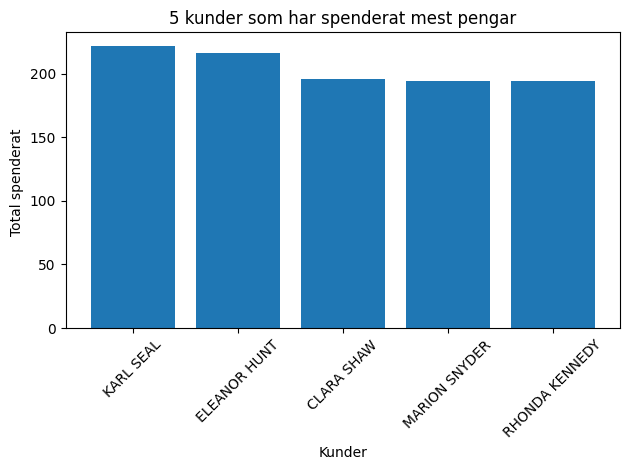

,customer,total
0,KARL SEAL,221.55
1,ELEANOR HUNT,216.54
2,CLARA SHAW,195.58
3,MARION SNYDER,194.61
4,RHONDA KENNEDY,194.61


In [ ]:
# Task 2a: Top 5 Kunder
# Denna kod hittar våra fem bästa kunder , de som har spenderat mest pengar hos oss.
# Sedan visar vi resultatet i ett tydligt diagram så chefen enkelt kan se vilka kunder som är mest värdefulla.
print(" Visa de 5 kunder som har spenderat mest pengar")
with duckdb.connect(duckdb_path) as conn:
    data = conn.execute("""
SELECT 
    first_name || ' ' || last_name as customer, 
    SUM(amount) as total
FROM customer, payment 
WHERE customer.customer_id = payment.customer_id
GROUP BY customer.customer_id, first_name, last_name 
ORDER BY total DESC
LIMIT 5;
""").df()


plt.bar(data['customer'], data['total'])
plt.title('5 kunder som har spenderat mest pengar')
plt.xlabel('Kunder')
plt.ylabel('Total spenderat')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

data

Task 2b: Intäkter per filmkategori


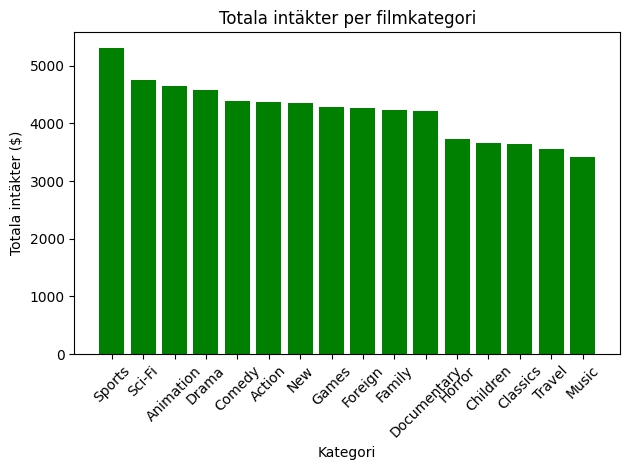

,kategori,total_intäkter
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


In [219]:
# Task 2b: Intäkter per filmkategori
# Beräknar totala intäkter för varje filmgenre
# JOIN-kedja: category > film_category > film > inventory > rental > payment
print("Task 2b: Intäkter per filmkategori")

with duckdb.connect(duckdb_path) as conn:
    task_intäkter = conn.execute("""
SELECT 
    category.name as kategori,
    SUM(payment.amount) as total_intäkter
FROM category
JOIN film_category ON category.category_id = film_category.category_id
JOIN film ON film_category.film_id = film.film_id
JOIN inventory ON film.film_id = inventory.film_id
JOIN rental ON inventory.inventory_id = rental.inventory_id
JOIN payment ON rental.rental_id = payment.rental_id
GROUP BY category.name
ORDER BY total_intäkter DESC;
""").df()


plt.bar(data['kategori'], data['total_intäkter'], color='green')
plt.title('Totala intäkter per filmkategori')
plt.xlabel('Kategori')
plt.ylabel('Totala intäkter ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

task_intäkter